In [1]:
import os
import csv
import json
import urllib
import requests
import random
import base64

from pprint import pprint
from random import sample
from urllib.request import urlretrieve
from k12libs.utils.nb_easy import k12ai_get_top_dir, RACEURL
from k12libs.utils.nb_easy import K12AI_DATASETS_ROOT
from IPython.display import display, HTML

## 开发调试

In [2]:
API_INFERENCE = f'{RACEURL}/raceai/framework/inference'
def img2b64(path):
    with open(path, 'rb') as fr:
        b4data = base64.b64encode(fr.read()).decode()
    return b4data

source_path = 'source.jpg'
target_path = 'target.jpg'

In [3]:
reqdata = '''{
    "task": "gan.faceswap",
    "cfg": {
        "data": {
            "class_name": "raceai.data.process.JsonBase64DataLoader",
            "params": {
                "data_source": {"/tmp/fsgan/source.jpg":\"%s\", "/tmp/fsgan/target.jpg":\"%s\"},
                "dataset": {
                    "class_name": "raceai.data.PredictSingleImageRaw",
                     "params": {}
                 }
             }
        },
        "model": {
            "class_name": f"fsgan.inference.swap.main",  
            "params": {
                "source": ["/tmp/fsgan/source.jpg"],
                "target": ["/tmp/fsgan/target.jpg"],
                "output": "/tmp/fsgan/"
            }
        },
    }
}''' % (img2b64(source_path), img2b64(target_path))

print(reqdata)

{
    "task": "gan.faceswap",
    "cfg": {
        "data": {
            "class_name": "raceai.data.process.JsonBase64DataLoader",
            "params": {
                "data_source": {"/tmp/fsgan/source.jpg":"/9j/4AAQSkZJRgABAQEASABIAAD/4RZuRXhpZgAASUkqAAgAAAAGABoBBQABAAAAVgAAABsBBQABAAAAXgAAACgBAwABAAAAAgAAADEBAgANAAAAZgAAADIBAgAUAAAAdAAAAGmHBAABAAAAiAAAAJoAAABIAAAAAQAAAEgAAAABAAAAR0lNUCAyLjEwLjE4AAAyMDIxOjAxOjE0IDIzOjA1OjAzAAEAAaADAAEAAAABAAAAAAAAAAgAAAEEAAEAAAAAAQAAAQEEAAEAAACQAAAAAgEDAAMAAAAAAQAAAwEDAAEAAAAGAAAABgEDAAEAAAAGAAAAFQEDAAEAAAADAAAAAQIEAAEAAAAGAQAAAgIEAAEAAABgFQAAAAAAAAgACAAIAP/Y/+AAEEpGSUYAAQEAAAEAAQAA/9sAQwAIBgYHBgUIBwcHCQkICgwUDQwLCwwZEhMPFB0aHx4dGhwcICQuJyAiLCMcHCg3KSwwMTQ0NB8nOT04MjwuMzQy/9sAQwEJCQkMCwwYDQ0YMiEcITIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIy/8AAEQgAkAEAAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RV

In [4]:
cfg = eval(reqdata)
resdata = json.loads(requests.post(url=API_INFERENCE, json=cfg).text)
resdata 

{'errno': 0,
 'result': {'b64img': 'iVBORw0KGgoAAAANSUhEUgAABQAAAALQCAIAAABAH0oBAAEAAElEQVR4nOz9W5MkS3IeCH6q5u6RmZVVp+rUOV3VffqGbgCNbpIgOBwC4BNlObJLIYXCl3nev7I/Z0VG8L4rsheSwp1BD4ABQFwIoBtoNvqgz73ulZkR4W6mug/qbmF+i4zIjMyMzPJPQiI9PdzNzczN1PRmqvR//b/9LwBUVUREBIATVdXFYjGfzxdvT7z3WZbNZrPZbEZEIAEAUjQoFADevnj5xRdfLM7OZrNZOJwdHR0dP3rIzEKOiMSxc46IADCgqkRERA4EoD7PDEACOlBVAFY3O44gIsqc3TgIVgDIkuNqfrpYLF6/ebVYLF5WS2bWw1mWZfcevnd4ePj+/QdERKfzt2/fnrx8VVXV6cvnL168ePnVlxICRAAcPPzg4cOHs6cfZllWzY6yLKP794qimM0OnXMHLnfOHWQHWZYduYyIcg0AMqiqkgZVDSGoaqybqlaLZVmW8/m8LMt5uayqqhQJIZTBW5OzLAMzEVljAgQAONSdQETWM0qdHrC+XQMrP35LchLt41iTg4ODLMsckapSIBEJIXjv7R3ZE4koltl5xPr6bFp/G4d7j/XttVeHpJfGzgt3yyEwACgPdpGiN5EAEamqKs50+0YzH7Msc85lWVYURZ7nhcsA5AQAoarsFdsIISIhADYKV3MzhBBCsPFg1Y7FElGkAGP9M9ZXsZ6dG+tHJF3HCiJirqmNTQwA1O+9kXGlrn+KmFlEVFWFOoMcDvFxzjnA3kpd595jGyonAsB6Js/zLMusrvZr7CgiYh0jbgwAXCXdlANQHXjvWNO3I6UPXywiBGaWZoLbqPDex/ceW1f3wEhRHZrQIQ79N249s+r2NW+wKcT6k5mtnwdLiGuHjVh7y9YWq5VXDyBgdBZ3Ks/CsQKZAgBTMtdoA+qnFKtKcN06996j


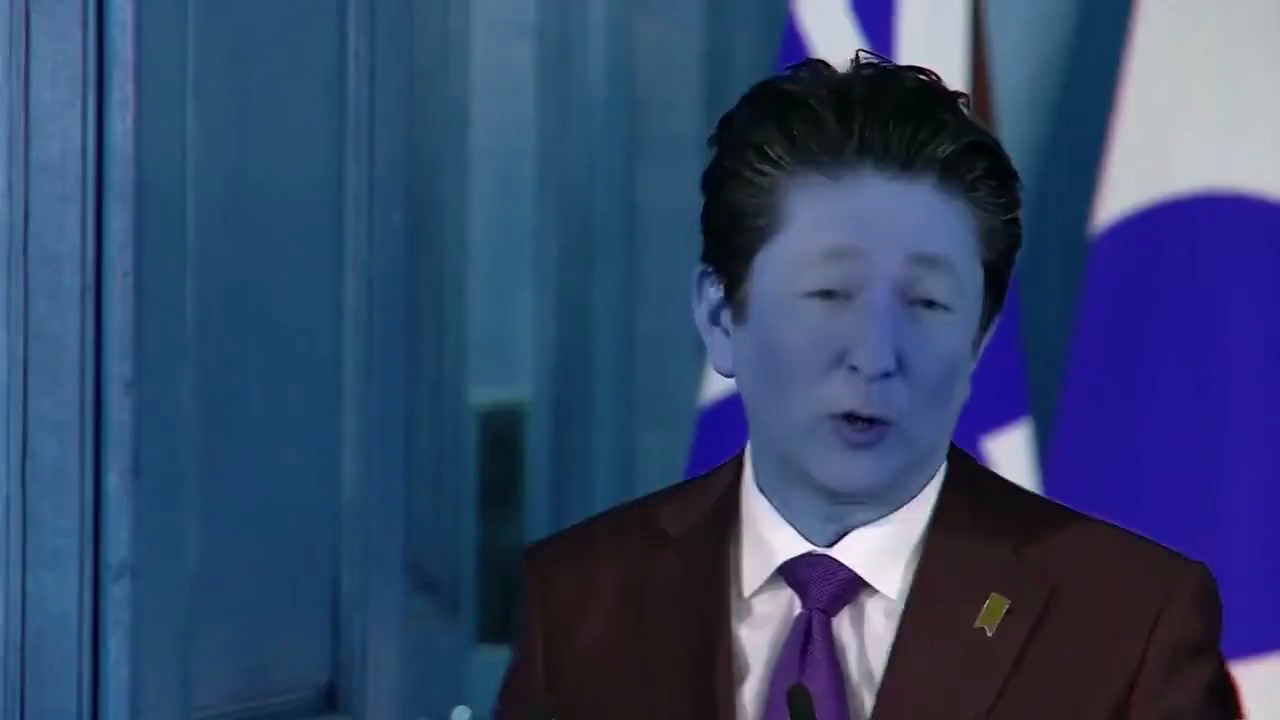

In [5]:
HTML(data='<img src="data:image/png;base64,{}"/>'.format(resdata['result']['b64img']))